In [1]:
import numpy as np
import torch

In [2]:
x = torch.rand(3,2)
x


 0.9594  0.2891
 0.5366  0.0986
 0.6576  0.0606
[torch.FloatTensor of size 3x2]

In [3]:
y = torch.ones(x.size())
y


 1  1
 1  1
 1  1
[torch.FloatTensor of size 3x2]

In [4]:
z = x+y
z


 1.9594  1.2891
 1.5366  1.0986
 1.6576  1.0606
[torch.FloatTensor of size 3x2]

In [5]:
## We can slice them like numpy 
z[:,1]


 1.2891
 1.0986
 1.0606
[torch.FloatTensor of size 3]

Tensors typically have two forms of methods, one method that returns another tensor and another method that performs the operation in place. That is, the values in memory for that tensor are changed without creating a new tensor. In place functions are always followed by an underscore, for example `z.add()` and `z.add_()`


In [6]:
z.add(1)


 2.9594  2.2891
 2.5366  2.0986
 2.6576  2.0606
[torch.FloatTensor of size 3x2]

In [7]:
z


 1.9594  1.2891
 1.5366  1.0986
 1.6576  1.0606
[torch.FloatTensor of size 3x2]

In [8]:
z.add_(1)


 2.9594  2.2891
 2.5366  2.0986
 2.6576  2.0606
[torch.FloatTensor of size 3x2]

In [9]:
z


 2.9594  2.2891
 2.5366  2.0986
 2.6576  2.0606
[torch.FloatTensor of size 3x2]

## Reshaping
Reshaping tensors is really common operation. First to get the size and shape of tensor use `.size()`.Then, to reshape a tensor, use `.resize_()`.Notice the undersocre, reshaping is an in-place operation.

In [10]:
z.size()

torch.Size([3, 2])

In [11]:
z.resize_(2,3)


 2.9594  2.2891  2.5366
 2.0986  2.6576  2.0606
[torch.FloatTensor of size 2x3]

In [12]:
z


 2.9594  2.2891  2.5366
 2.0986  2.6576  2.0606
[torch.FloatTensor of size 2x3]

## Numpy to Torch and back
Converting between Numpy arrays and Torch tensors is super simple and useful. To create a tensor form Numpy array, use `torch.from_numpy()`. To convert a tensor to a Numpy array, use the `.numpy()` method.

In [14]:
a  = np.random.rand(4,3)
a

array([[0.69308973, 0.09646615, 0.97728747],
       [0.72016418, 0.5282418 , 0.97438102],
       [0.48658814, 0.61781038, 0.26487553],
       [0.84180575, 0.57768569, 0.75021959]])

In [15]:
b = torch.from_numpy(a)
b


 0.6931  0.0965  0.9773
 0.7202  0.5282  0.9744
 0.4866  0.6178  0.2649
 0.8418  0.5777  0.7502
[torch.DoubleTensor of size 4x3]

In [16]:
b.numpy()

array([[0.69308973, 0.09646615, 0.97728747],
       [0.72016418, 0.5282418 , 0.97438102],
       [0.48658814, 0.61781038, 0.26487553],
       [0.84180575, 0.57768569, 0.75021959]])

The memory is shared between the Numpy array and Torch tensor, so if we change the value in-place of one object, the other will change as well.

In [17]:
b.mul_(2)


 1.3862  0.1929  1.9546
 1.4403  1.0565  1.9488
 0.9732  1.2356  0.5298
 1.6836  1.1554  1.5004
[torch.DoubleTensor of size 4x3]

In [18]:
a

array([[1.38617947, 0.19293231, 1.95457494],
       [1.44032836, 1.0564836 , 1.94876203],
       [0.97317629, 1.23562076, 0.52975106],
       [1.68361149, 1.15537138, 1.50043918]])

## Neural networks with PyTorch

In [2]:
%matplotlib inline

#import helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms


In [3]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
                               ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/',download=True, train=True,
                         transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [23]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

We have the training data loaded into `trainloader` and we make that na iterator with `iter(trainloader)`. We'd use this to loop through the dataset for training, but here I'm just grabbing the first batch sow we can check out the data.We can see below that `images` is just tensor with size (64, 1, 28, 28). So, 64 images per batch, 1 color channel, and 28x28 images.

In [26]:
images.size()
# 64 is batchsize
# 1 channel size so black and white image
# 28x28 is width x length

torch.Size([64, 1, 28, 28])

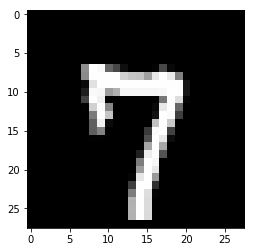

In [30]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r');

## Building networks with Pytorch

Here we'll use PyTroch to build a simple feedforward network to classify the MNIST images. That is, the network will receive a digit image as input and predict the digit in the images. 

### Network summary
* inputLayer(784) -> HiddenLayer1(128) -> HiddenLayer2(64) -> OutputLayer(10) -> LossLayer(cross entropy)



To build a neural network with PyTorch, we use the `torch.nn` module. The network itself is **class inheriting** from `torch.nn.Module`. We define each of the operations separately, like `nn.Linear(784, 128)` for a fully connected linear layer with 784 inputs and 128 units.

The class needs to inculde a `forward` method that implements the forward pass through the network. In this method, we pass some input tensor `x` through each of the operations we defined earlier. The `torch.nn` module also has functional equivalent for things like ReLUs in `torch.nn.functional`. This module is uaually imported as `F`. THen to use ReLU activation on some layer (which is just tensor),we'd do `F.relu(x)`.
<br>$tanh(x)=\frac{2}{1 + e^{-2x}}-1$


In [5]:
from torch import nn
import torch.nn.functional as F

In [6]:
class Network(nn.Module):
    def __init__(self):
        super().__init__() ## calls the init method of nn.Module class
        
        ## Defining architecture of our NN
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self,x): ## x is a PyTorch tensor
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x,dim=1) ## x dimension (batch_size,output_layer)
        
        return x
    
model = Network()
model 
    

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

## Initializing weights and biases 

The weight and such are automatically initialized of us, but it's possible to customize how they are intitialized. The weights and biases are tensors attached to the layer we defined, we can get them with `model.fc1.weight` for instance.


In [37]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
1.00000e-02 *
 2.0380 -0.9702 -0.6042  ...  -3.3627  3.3756 -3.1681
 3.4554 -1.8584  2.0858  ...   1.7871  3.4589  3.0426
-2.0556  1.2204  1.7049  ...  -0.2535  3.1532 -0.8945
          ...             ⋱             ...          
-0.6080  2.8535  2.5105  ...  -1.3106 -0.2657 -1.9641
 0.6631  3.4396  1.8102  ...   0.2219 -3.0908 -2.1933
-0.3851  0.7717  1.9081  ...  -3.2981  3.4775 -1.9514
[torch.FloatTensor of size 128x784]

Parameter containing:
1.00000e-02 *
  1.5002
  2.1226
  3.4332
 -1.9844
 -2.4903
 -2.2037
 -2.3775
 -1.4231
 -1.3111
 -0.6829
 -3.5619
  0.3586
 -3.5230
 -2.9998
 -0.9786
  0.6031
  1.8653
  2.6148
  1.4130
 -2.4119
  3.5293
  0.9330
 -1.5652
 -0.6715
  1.3817
  1.7881
  0.8383
 -3.3728
 -2.0068
  1.8602
  0.3209
 -0.4366
 -1.9947
  0.5025
  2.2558
  2.5077
 -2.2163
  1.7415
  3.5629
 -2.9644
 -1.4071
  1.0051
  3.2749
 -0.6647
 -2.2725
  3.3667
  3.5495
  2.2987
 -3.3816
 -1.1975
 -1.9135
 -2.1939
 -3.1940
 -2.6132
 -0.4266
 -1.7732
  1.0596


In [39]:
model.fc1.weight.data.normal_(std=0.1)


-1.4444e-01  2.1468e-01  2.5262e-02  ...  -1.2799e-01 -4.5069e-02 -4.1398e-02
-1.5676e-01  1.1333e-01 -7.2867e-02  ...   2.6565e-01  1.3103e-01 -1.1353e-02
-1.6840e-01 -1.4185e-01  1.6091e-01  ...   6.1927e-02 -4.3640e-03  5.9997e-02
                ...                   ⋱                   ...                
 2.0832e-01  2.5102e-02 -1.2298e-01  ...  -3.4854e-02 -9.7913e-02  2.0798e-01
 9.0667e-02  7.2290e-02 -6.2925e-02  ...  -1.7155e-01 -4.7951e-02  8.6481e-02
 1.1777e-01  1.1152e-01 -1.9407e-01  ...  -8.3053e-03  1.5506e-02 -2.9949e-02
[torch.FloatTensor of size 128x784]

In [49]:
model.fc1.bias.data.normal_(std=0.1)



 0.0922
-0.0768
 0.0460
-0.0001
 0.0463
-0.0021
 0.0358
-0.0577
-0.0378
-0.0726
-0.0806
 0.1048
-0.0804
 0.0425
-0.0332
-0.0551
-0.2615
-0.1452
 0.0209
 0.0612
-0.1499
-0.0161
-0.0437
-0.0264
-0.0248
-0.0871
 0.0978
-0.0055
-0.0223
-0.1226
-0.1224
-0.0278
 0.1323
-0.0517
-0.0352
-0.0408
 0.1584
 0.1351
 0.0506
 0.1626
 0.0689
 0.0930
 0.0315
-0.0174
-0.2004
 0.0749
 0.0286
 0.0813
 0.1335
 0.0349
-0.1159
-0.0224
-0.1096
-0.0250
-0.0088
-0.1269
-0.2541
 0.1841
 0.1876
 0.0636
 0.1291
 0.1518
-0.0509
 0.0713
 0.0746
 0.1796
 0.1056
-0.1231
-0.0601
-0.1616
 0.0893
-0.0255
 0.0420
-0.1269
 0.0735
 0.0427
-0.0081
-0.0686
 0.0126
 0.0181
-0.1094
-0.0862
 0.0426
 0.1013
 0.0799
 0.0796
 0.0537
-0.1756
 0.0828
 0.0480
-0.0553
 0.1216
-0.2561
-0.0195
 0.0262
 0.0153
 0.0164
 0.0830
-0.0494
 0.0443
-0.0269
 0.0362
 0.0360
 0.1588
-0.0180
-0.0975
 0.2635
-0.0461
 0.0398
 0.0757
-0.0587
 0.1534
 0.0938
 0.0608
 0.1282
 0.1200
 0.0782
-0.0333
-0.0404
 0.0132
-0.0093
-0.0178
 0.0601
 0.1256
 0.0698

## Forward pass

Now that we have a network, let's see what happens when we pass in an image. This is called forward pass. We're going to covert the image data into a tensor, then pass it through the operation defined by the network architecture.

In [8]:
import pandas as pd

In [15]:
images, labels = next(iter(trainloader)) ## trainloader is a generator

images.resize_(64,1,784)
# print(images.size())
# images.resize_(,1,784)
ps = model.forward(images[0,:])
ps


tensor([[ 0.0845,  0.1116,  0.0993,  0.1095,  0.0841,  0.1077,  0.1070,
          0.1104,  0.1043,  0.0816]])

PyTorch provides a convient way to build networks like where a tensor is passed sequentially through operations, `nn.Sequential`.

In [24]:
input_size = 784
hidden_size = [128, 64]
output_size = 10
model = nn.Sequential(nn.Linear(input_size,hidden_size[0]),nn.ReLU(),
                     nn.Linear(hidden_size[0],hidden_size[1]),nn.ReLU(),
                      nn.Linear(hidden_size[1],output_size),nn.Softmax(dim=1))
print(model)

## Forward pass through the network and display the output
images, labels = next(iter(trainloader))
images.resize_(64,1,784)
ps = model.forward(images[0,:])
ps

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


tensor([[ 0.0816,  0.0966,  0.1195,  0.0930,  0.0960,  0.0979,  0.0959,
          0.1202,  0.1154,  0.0839]])

We can also pass in an `OrderedDict` to name the individual layers and operations. Note that a dictionary keys must be unique, so each operation must have a different name.

In [25]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
    ('fc1',nn.Linear(input_size,hidden_size[0])),
    ('relu1',nn.ReLU()),
    ('fc2',nn.Linear(hidden_size[0],hidden_size[1])),
    ('relu2',nn.ReLU()),
    ('fc3',nn.Linear(hidden_size[1],output_size)),
    ('softmax',nn.Softmax(dim=1))
]))
model 

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

> **Exercise**: Build a network to classify the MNIST images with three hidden layers. Use 400 units in the first hidden layer, 200 units in the second layer, and 100 units in the third layer. Each hidden layer should have a ReLU activation function, and use softmax on the output layer.

In [30]:
input_size = 784
output_size = 10
hidden_size = [400,200,100]

model = nn.Sequential(OrderedDict([
    ('fc1',nn.Linear(input_size,hidden_size[0])),
    ('relu1',nn.ReLU()),
    ('fc2',nn.Linear(hidden_size[0],hidden_size[1])),
    ('relu2',nn.ReLU()),
    ('fc3',nn.Linear(hidden_size[1],hidden_size[2])),
    ('relu3',nn.ReLU()),
    ('fc4',nn.Linear(hidden_size[2],output_size)),
    ('softmax',nn.Softmax(dim=1))
]))
model 

images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
ps

tensor([[ 0.0979,  0.0946,  0.0980,  0.0974,  0.0942,  0.0998,  0.1046,
          0.1053,  0.1034,  0.1046]])

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


The first thing we need to do for training is define our loss function. In Pytorch, we'll usually see this as `criterion`. Here we're using softmax ouput, so we want to use `criterion = nn.CrossEntropyLoss()` as our loss. Later when training, we use `loss = Criterion(output, targets)` to calculate the actual loss.

We also need to define the optimizer we're using, SGD or Adam, or something along those lines. Here I'll just use SGD with `torch.optim.SGD`, passing in the network parameters and the learning rate.

## Autograd
Torch provide a module, `autograd`, for automatically calculating the gradient of tensors. It does this by keeping track of operations performed on tensor. To make sure PyTorch keeps track of operations on a tensor and calculate the gradients, we need to set `require_grad` on a tensor. We can do this at creation with the `require_grad` keyword, or at any time with `x.requires_grad_(True)`.


We can turn off gradients for a block of code with the `torch.no_grad()` content:
```python
x = torch.zeros(1, requires_grad=True)
>>> with torch.no_grad():
...     y = x * 2
>>> y.requires_grad
False
```

Also, we can trun on or off gradients altogether with `torch.set_grad_enabled(True|False)`

The gradient are computed with respect to some variable `z` with `z.backward()`. This does a backward pass through the operations that created `z`. 

In [49]:
x = torch.randn(3,3, requires_grad=True)
x

tensor([[ 1.8221, -0.0212, -0.2925],
        [-0.1392,  1.3154,  0.7319],
        [-1.6575,  0.0801,  1.0192]])

In [50]:
y = x**2
y

tensor([[ 3.3201,  0.0004,  0.0855],
        [ 0.0194,  1.7302,  0.5357],
        [ 2.7473,  0.0064,  1.0387]])

In [51]:
print(y.grad_fn)

In [52]:
z = y.mean()
print(z)

tensor(1.0538)


We can check the gradient for `x` and `y` but they are empty currently.

In [53]:
print(x.grad,y.grad)

None None


To calculate the gradients, you need to run the `.backward` method on a Variable, `z` for example. This will calculate the gradient for `z` with respect to `x`

$$
\frac{\partial z}{\partial x} = \frac{\partial}{\partial x}\left[\frac{1}{n}\sum_i^n x_i^2\right] = \frac{x}{2}
$$

In [54]:
z.backward()
print(x.grad)
print(x*(2/9))

tensor([[ 0.4049, -0.0047, -0.0650],
        [-0.0309,  0.2923,  0.1626],
        [-0.3683,  0.0178,  0.2265]])
tensor([[ 0.4049, -0.0047, -0.0650],
        [-0.0309,  0.2923,  0.1626],
        [-0.3683,  0.0178,  0.2265]])


These gradients calculations are particularly useful for neural networks. For training we need the gradients of the weights with respect to the cost. With PyTorch, we run data forward through the network to calculate the cost, then, go backwards to calculate the gradients with respect to the cost. Once we have the gradients we can make a gradient descent step. 

We'll build a network with `nn.Sequential` here. Only difference from the last part is I'm not actually using softmax on the output, but instead just using the raw output from the lost layer. This is because the output from softmax is probability distribution. Often, the ouptut will have values really closed to zero or really close to close to one. Due to inaccuracies with representation numbers as floating points, computation with a softmax output can lose accuracy and become unstable. To get around this, we'll use the raw output, called **logits**, to calcualte the loss.

In [56]:
#Hyperparameters for our network
input_size = 784
hidden_size = [128,64]
output_size = 10

model = nn.Sequential(OrderedDict([
    ('fc1',nn.Linear(input_size,hidden_size[0])),
    ('relu1',nn.ReLU()),
    ('fc2',nn.Linear(hidden_size[0],hidden_size[1])),
    ('relu2',nn.ReLU()),
    ('logits',nn.Linear(hidden_size[1],output_size))
]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (logits): Linear(in_features=64, out_features=10, bias=True)
)

## Training the network!
The first thing we need to do for training is define our loss function. In Pytorch, we'll usually see this as `criterion`. Here we're using softmax output, so we want to use `criterion = nn.CrossEntropyLoss()` as our loss. Later when training, we use `loss = criterion(output, targets)` to calculate the actual loss.

We also need to define optimizer we're using, SGD or Adam, or something along those lines. Here I'll just use SGD with `torch.optim.SGD`, passing in the network parameters and the learning rate.

In [57]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

First, let's consider just one learning step before looping through all the data.
The general process with PyTorch:
* Make a forward pass through the network to get the logits
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the the optimizer to update weights

In [58]:
print('Initial weights - ', model.fc1.weight)

images, labels = next(iter(trainloader))
images.resize_(64,784)

# Clear the gradients, do this because gradients are accumulated 
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights 
output = model.forward(images)
loss = criterion(output,labels)
loss.backward()
print('Gradient - ', model.fc1.weight.grad)
optimizer.step()

Initial weights -  Parameter containing:
tensor([[-2.7111e-02,  1.3836e-02,  2.5886e-02,  ..., -1.4867e-02,
         -9.8428e-03, -6.2038e-03],
        [-3.0883e-02,  1.7498e-02,  3.0558e-02,  ..., -2.0247e-02,
         -1.9177e-02, -1.9072e-02],
        [ 8.7670e-03,  3.5633e-02,  9.7913e-03,  ..., -1.8948e-02,
         -2.0131e-03,  8.2791e-03],
        ...,
        [ 4.2191e-04, -3.3190e-02,  6.7878e-03,  ...,  3.1593e-02,
          6.6738e-03,  2.1985e-02],
        [ 3.7708e-03,  1.5728e-02, -8.7492e-05,  ...,  3.3355e-02,
          7.0147e-03, -2.1429e-02],
        [-7.7849e-03, -3.3800e-02, -2.5990e-02,  ...,  1.4680e-02,
         -2.1666e-02, -3.1533e-02]])
Gradient -  tensor(1.00000e-02 *
       [[-0.0120, -0.0120, -0.0120,  ..., -0.0120, -0.0120, -0.0120],
        [ 0.0084,  0.0084,  0.0084,  ...,  0.0084,  0.0084,  0.0084],
        [ 0.0970,  0.0970,  0.0970,  ...,  0.0970,  0.0970,  0.0970],
        ...,
        [-0.0852, -0.0852, -0.0852,  ..., -0.0852, -0.0852, -0.0852],
 

In [59]:
print('Updated weights - ', model.fc1.weight)

Updated weights -  Parameter containing:
tensor([[-2.7109e-02,  1.3837e-02,  2.5887e-02,  ..., -1.4866e-02,
         -9.8416e-03, -6.2026e-03],
        [-3.0884e-02,  1.7497e-02,  3.0557e-02,  ..., -2.0248e-02,
         -1.9178e-02, -1.9073e-02],
        [ 8.7573e-03,  3.5623e-02,  9.7816e-03,  ..., -1.8958e-02,
         -2.0228e-03,  8.2694e-03],
        ...,
        [ 4.3043e-04, -3.3182e-02,  6.7964e-03,  ...,  3.1601e-02,
          6.6823e-03,  2.1993e-02],
        [ 3.7675e-03,  1.5725e-02, -9.0786e-05,  ...,  3.3352e-02,
          7.0114e-03, -2.1432e-02],
        [-7.7643e-03, -3.3780e-02, -2.5969e-02,  ...,  1.4701e-02,
         -2.1645e-02, -3.1512e-02]])


### Training for real

Now we'll put this algorithm into a loop so we can go through all the images. This is fairly straightforward. We'll loop through the mini-batches in our dataset, pass the data through the network to calculate the losses, get the gradients, then run the optimizer.

In [60]:
optimizer = optim.SGD(model.parameters(),lr=0.003)

In [62]:
epoch = 3
print_every = 40
steps = 0
for e in range(epoch):
    running_loss = 0
    for images,labels in iter(trainloader):
        steps+=1
        ## Flatten the MNIST images into a 784 long vector
        images.resize_(images.size()[0],784)
        
        optimizer.zero_grad()
        
        ## Forward and backward passes
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward() ##calculating gradient
        optimizer.step() ## gradient decent 
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print('Epoch: {}/{}...'.format(e+1,epoch),
                 'Loss: {:.4f}'.format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/3... Loss: 2.2717
Epoch: 1/3... Loss: 2.2491
Epoch: 1/3... Loss: 2.2272
Epoch: 1/3... Loss: 2.1962
Epoch: 1/3... Loss: 2.1744
Epoch: 1/3... Loss: 2.1394
Epoch: 1/3... Loss: 2.1013
Epoch: 1/3... Loss: 2.0586
Epoch: 1/3... Loss: 2.0268
Epoch: 1/3... Loss: 1.9713
Epoch: 1/3... Loss: 1.9392
Epoch: 1/3... Loss: 1.8778
Epoch: 1/3... Loss: 1.8074
Epoch: 1/3... Loss: 1.7575
Epoch: 1/3... Loss: 1.6892
Epoch: 1/3... Loss: 1.6108
Epoch: 1/3... Loss: 1.5460
Epoch: 1/3... Loss: 1.4690
Epoch: 1/3... Loss: 1.3896
Epoch: 1/3... Loss: 1.3345
Epoch: 1/3... Loss: 1.2560
Epoch: 1/3... Loss: 1.1769
Epoch: 1/3... Loss: 1.1698
Epoch: 2/3... Loss: 0.6008
Epoch: 2/3... Loss: 1.0611
Epoch: 2/3... Loss: 1.0194
Epoch: 2/3... Loss: 0.9602
Epoch: 2/3... Loss: 0.9266
Epoch: 2/3... Loss: 0.8932
Epoch: 2/3... Loss: 0.8745
Epoch: 2/3... Loss: 0.8479
Epoch: 2/3... Loss: 0.8158
Epoch: 2/3... Loss: 0.7938
Epoch: 2/3... Loss: 0.7799
Epoch: 2/3... Loss: 0.7713
Epoch: 2/3... Loss: 0.7248
Epoch: 2/3... Loss: 0.7046
E

with the network trained, we can check out it's predictions.

In [63]:
images, labels = next(iter(trainloader))
img = images[0].view(1,784)
## Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)
    
#Output the network are logits, neeed to take softmax for proabailities
ps = F.softmax(logits,dim=1)


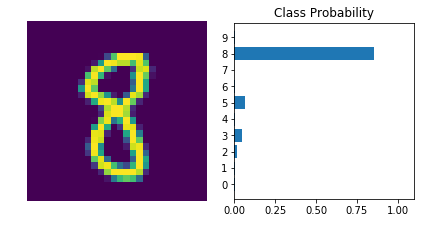

In [65]:
view_classify(img.view(1,28,28),ps)

Now our network is brilliant. It can accurately predict the digits in our images. Next up you'll write the code for training a neural network on a more complex dataset.

## Inference and Validation
Now that we have trained network, we can use it for making predictions. This is typically called **inference**, a term borrowed from statistics. However, neural network have tendency of perform too well on the training data and aren't able to generalize to data that hasn't been seen before. This is called **overfitting** and it impairs inference performance. To test for overfitting while training, we measure the performance on data not in the training set called the **validation** dataset. We avoid overfitting through regularization such as dropout while monitoring the validation performance during training. In this notebook.

First off, I'll implement my own feedforward network for the exercise you worked on in part 4 using the Fashion-MNIST dataset.

As usual, let's start by loading the dataset through torchvision. You'll learn more about torchvision and loading data in a later part.

In [66]:
#Define a transform to normalize the data
trasform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle = True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/',download=True, train=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=64, shuffle=True)

Processing...
Done!


## Building the network

As with MNIST, each image in Fashion-MNIST is 28x28 which is a total of 784 pixels, and there are 10 classes. I'm going to get a bit more advanced here, I want to be able to build a network with an arbitrary number of hidden layers. That is, I want to pass in a parameter like `hidden_layers = [512, 256, 128]` and the network is constructed with three hidden layers have 512, 256, and 128 units respectively. To do this, I'll use `nn.ModuleList` to allow for an arbitrary number of hidden layers. Using `nn.ModuleList` works pretty much the same as a normal Python list, except that it registers each hidden layer `Linear` module properly so the model is aware of the layers.

The issue here is I need a way to define each `nn.Linear` module with the appropriate layer sizes. Since each `nn.Linear` operation needs an size and an output size,

```python
# Create ModuleList and add input layer
hidden_layers = nn.ModuleList([nn.Linear(input_size,hidden_layers[0])])
# Add hidden layers to the Module List
hidden_layers.extend([nn.Linear(h1,h2) for h1,h2 in layer_sizes])
```

Getting these pairs of input and output sizes can be done with a handy trick using `zip`.

```python
hidden_layer = [512, 256, 128, 64]
layer_sizes = zip(hidden_layers[:-1],hidden_layers[1:])
for each in layer_sizes:
    print(each)

>> (512, 256)
>> (256, 128)
>> (128, 64)
```

I also have the `forward` method returning the log-softmax for the output. Since softmax is a probability distribution over the classes, the log-softmax is a log probability which comes with a [lot of benefits](https://en.wikipedia.org/wiki/Log_probability). Using the log probability, computations are often faster and more accurate. To get the class probabilities later, I'll need to take the exponential (`torch.exp`) of the output. 

$$ \large{e^{\ln{x}} = x }$$

We can include dropout in our network with [`nn.Dropout`](http://pytorch.org/docs/master/nn.html#dropout). This works similar to other modules such as `nn.Linear`. It also takes the dropout probability as an input which we can pass as an input to the network.

In [68]:
class Network(nn.Module):
    def __init__(self,input_size,output_size, hidden_layers, drop_p = 0.5):
        """Builds a feedforward network with arbitrary hidden layers.
        
        Arguments
        ---------
        input_size: integer, size of the input
        output_size: integer, size of the output layer
        hidden_layers: list of integers, the sizes of the hidden layers
        drop_p: float between 0 and 1, dropout probability
        """
        super().__init__()
        # Add the first layer, input to a hidden layer
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size,hidden_layers[0])])
        
        # Add a variable number of more hidden layers
        layer_sizes = zip(hidden_layers[:-1],hidden_layers[1:])
        self.hidden_layers.extend([nn.Linear(h1,h2) for h1,h2 in layer_sizes])
        
        self.output = nn.Linear(hidden_layers[-1],output_size)
        self.dropout = nn.Dropout(p=drop_p)
        
    def forward(self,x):
        """Forward pass through the network, returns the output logits"""
        
        # Forward through each layers in `hidden_layers`, with ReLU activation and dropout
        for linear in self.hidden_layers:
            x = F.relu(linear(x))
            x = self.dropout(x)
        x = self.output(x)
        return F.log_softmax(x, dim=1)
model = Network(784,10,[516,256])
model

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=516, bias=True)
    (1): Linear(in_features=516, out_features=256, bias=True)
  )
  (output): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)

# Train the network

Since the model's forward method returns the log-softmax, I used the [negative log loss](http://pytorch.org/docs/master/nn.html#nllloss) as my criterion, `nn.NLLLoss()`. I also chose to use the [Adam optimizer](http://pytorch.org/docs/master/optim.html#torch.optim.Adam). This is a variant of stochastic gradient descent which includes momentum and in general trains faster than your basic SGD.

I've also included a block to measure the validation loss and accuracy. Since I'm using dropout in the network, I need to turn it off during inference. Otherwise, the network will appear to perform poorly because many of the connections are turned off. PyTorch allows you to set a model in "training" or "evaluation" modes with `model.train()` and `model.eval()`, respectively. In training mode, dropout is turned on, while in evaluation mode, dropout is turned off. This effects other modules as well that should be on during training but off during inference.

The validation code consists of a forward pass through the validation set (also split into batches). With the log-softmax output, I calculate the loss on the validation set, as well as the prediction accuracy.

In [96]:
# Create the network, define the criterion and optimizer
model = Network(784, 10 , [516,256],drop_p=0.5)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model(x).detach()

In [71]:
# Implement a function for the validation pass
def validation(model, testloader, criterion):
    test_loss = 0
    accuracy = 0
    for images, labels in testloader:
        
        images.resize_(images.shape[0],784)
        
        output = model.forward(images)
        test_loss += criterion(output, labels).item()
        
        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    return test_loss, accuracy

In [97]:
epochs = 2
steps = 0
running_loss = 0
print_every = 40

for e in range(epochs):
    model.train()
    for images, labels in trainloader:
        steps+=1
        
        #Flatten images into a 784 long vector
        images.resize_(images.size()[0],784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward(labels.grad)
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps%print_every == 0:
            # Make sure network is in eval mode for inference
            model.eval()
            
            # Trun off gradients for validation, saves memory and computations
            with torch.no_grad():
                test_loss, accuracy = validation(model,testloader,criterion)
                
            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
            running_loss = 0
            
            # Make sure trainign is back on
            model.train()

Epoch: 1/2..  Training Loss: 1.282..  Test Loss: 0.809..  Test Accuracy: 0.697


KeyboardInterrupt: 

# Inference 
Now that the model is trained, we can use it for inference. We've done this before, but now we need to remember to set the model in inference mode with `model.eval()`.We'll also want to turn off autograd with `torch.no_grad()` context.

tensor([[ 7.7985e-12,  1.0000e+00,  4.8038e-13,  2.8291e-09,  1.3598e-12,
          5.7526e-18,  2.7550e-14,  6.9943e-17,  4.6248e-17,  2.4475e-18]])


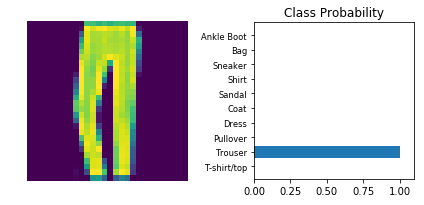

In [92]:
## Test out our network
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]
#Convert 2D image to 1D vector
img = img.view(1, 784)

#Calculate the class probability (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)
print(ps)
#Plot the image and probabilities
view_classify(img.view(1,28,28),ps,version='Fashion')

# Saving and Loading Trained Networks

In [76]:
model


Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=516, bias=True)
    (1): Linear(in_features=516, out_features=256, bias=True)
  )
  (output): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)

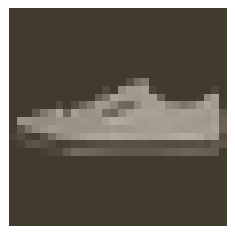

In [77]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

# Saving and loading networks
As you imagine, it's impractical to train a network every time you need to use it, Instead, we can save the trained networks then load them later to train more or use them for prediction.

The parameters for PyTorch networks are stored in model's `state_dict`. We can see the state dict contains the weight and bias matrices for each of our layers.


In [78]:
print("Our model: \n\n", model,"\n")
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=516, bias=True)
    (1): Linear(in_features=516, out_features=256, bias=True)
  )
  (output): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'output.weight', 'output.bias'])


The simplest thing to do is simply save the state dict with `torch.save`. For example, we can save it to a file `checkpoint.pth`

In [79]:
torch.save(model.state_dict(), 'checkpoint.pth')

Then we can load the state dict with `torch.load`.

In [80]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'output.weight', 'output.bias'])


And to load the state dict in to the network, we do
`model.load_state_dict(state_dict)`

In [81]:
model.load_state_dict(state_dict)

Seems pretty straightforward, but as usual it's a bit more complicated. Loading the state dict works only if the model architecture is exactly the same as the checkpoint architecture. If I create a model with a different arhitecture, this fails.

In [89]:
checkpoint = {'input_size':784,
             'output_size':10,
             'hidden_layers':[each.out_features for each in model.hidden_layers],
             'state_dict':model.state_dict()}
torch.save(checkpoint,'checkpoint.pth')

Now the checkpoint has all the necessary information to rebuild the trained model. You can easily make that a function if you want. Similarly, we can write a function to load checkpoints. 

In [90]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [91]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=516, bias=True)
    (1): Linear(in_features=516, out_features=256, bias=True)
  )
  (output): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)


## Loading data sets with Torchvision

So far we've been working with fairly artificial datasets that we wouldn't typically be using in real projects. Instead, we'll likely dealing with full-sized images like we'd get from smart phone cameras. In this notebook, we'll look at how to load images and use them to train networks.

The easiest way to load image data is with `datasets.ImageFolder` form `torchvision`. In general we'll use `ImageFolder` like so:
```python
dataset = datasets.ImageFolder('path/to/data',transform=transforms)
```
where `path/to/data` is the file path to the data directory and `transforms` a list of processing steps built with `transforms` module from `torchvision`.ImageFolder expects the file and directories to be constructed like so:

```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```
where each class has it's own directory (`cat` and `dog`) for the images. The images are then labeled with the class taken from the directory name. So here, the image `123.png` would be loaded with the class label `cat`. We can download the dataset already structured like this  [from here](https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip). I've also split it into a training set and test set.


## Transforms
When we load in the data with `ImageFolder`, we'll need to define some transforms. For example, the images are different sizes but we'll need them to all be the same soze of trainign. We can either resize them with `transforms.Resize()` or crop with `transforms.CenterCrop()`, `transforms.RandomResizedCrop()`, etc. We'll also need to convert the images to Pytorch tensor with `transforms.ToTensor()`. Typically we'll combine these transforms into a pipeline with `transform.Compose()`, which accepts a list fo transforms and runs them in sequence. It looks something like this to scale, then convert to a tensor:
```python
transforms = transforms.Compose([transfroms.Resize(255),
                                 transforms.CenterCrop(244),
                                 transforms.ToTensor()])
```
Ther are plenty of transforms available, I'll cover more in a bit and we can read through the documentation.


## Data Loaders
With the `ImageFolder` loaded, we have to pass it to a DataLoader. The `DataLoader` takes a dataset (such as we would get from `ImageFolder`) and returns batches of images and the corresponding labels. We can set various parameters like the batch size and if the data is shuffled after each epoch.
```python
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 32, shuffle = True)
```
Here `dataloader` is a generator. To get data out of it, we need to loop through it or convert it to an iterator and call `next()`.

```python
# Looping through it, get a batch on each loop
for images, labels in dataloader:
    pass

# Get one batch
images, labels = next(iter(dataloader))
```

## Data Augmentation
A common strategy for training neural networks is to introduce randomness in the input data itself. For example, we can randomly rotate, mirror, scale, and/or crop our images during training. This will help our network generalize as it's seeing the same images bu in different locations, with different sizes, in different orientations, etc.

To randomly rotate, scale and crop, then flip our images we would define our transform like this:
```python

train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(100), transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normailize([0.5]*3,[0.5]*3)
```
We'll also typically want to normalize images with the `transforms.Normalize`. We pass in a list of means and list of standard deviations, then the color channels are normalized like so
`input[channel] = (input[channel] - mean[channel])/std[channel]`
Substracting `mean` centers the data around zero and dividing by `std` squishes the values to be betweeb -1 and 1. Normalizing helps keep the network work weights near zero which in turn makes backpropagation more stable. Without normalizing, networks will tend to fail to learn.

* When we're testing however, we'll want to use images that aren't altered (except we'll need to normalize the same way). So far validation/test images, we typically just resize and crop.


```python
train_transforms = transforms.Compose([
    #transforms.Resize(255),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(128),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
   transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5]),
    
])

test_transforms = transforms.Compose([
    transforms.RandomResizedCrop(128),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5]),
    
])

```

## Transfer Learning

24576